<a href="https://colab.research.google.com/github/iam-fern/Generate_groupwise/blob/main/GQtest_groupwise_(y_hat)_0_5_n250_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_groupwise/groupwise_0.5_type_I _error'

In [4]:
os.listdir(base_path)

['data_groupwise_0.5_n20.csv',
 'data_groupwise_0.5_n30.csv',
 'data_groupwise_0.5_n60.csv',
 'data_groupwise_0.5_n120.csv',
 'data_groupwise_0.5_n250.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_groupwise_0.5_n250.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,72.978485,38.013333,24.385119,-0.232886,145.144051,145.360293,-0.216242
1,0.0,1.0,21.928331,84.652559,73.651364,0.188404,190.420658,190.097467,0.323191
2,0.0,2.0,71.177093,27.185101,48.641749,0.757913,157.761856,157.014083,0.747774
3,0.0,3.0,94.847132,99.282300,83.859815,-0.962247,287.027001,288.033922,-1.006921
4,0.0,4.0,30.203497,95.363852,69.850630,0.079159,205.497138,205.291731,0.205407
...,...,...,...,...,...,...,...,...,...
249995,999.0,245.0,33.125421,67.370802,69.374315,-0.698572,179.171966,179.878953,-0.706987
249996,999.0,246.0,41.495089,27.086230,39.348634,-0.750337,117.179616,117.961665,-0.782049
249997,999.0,247.0,76.937427,70.574553,76.369962,0.475976,234.357918,233.849586,0.508332
249998,999.0,248.0,99.315378,50.345144,32.471026,0.980272,193.111821,192.170802,0.941019


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,72.978485,38.013333,24.385119,-0.232886,145.144051,145.360293,-0.216242
1,0.0,1.0,21.928331,84.652559,73.651364,0.188404,190.420658,190.097467,0.323191
2,0.0,2.0,71.177093,27.185101,48.641749,0.757913,157.761856,157.014083,0.747774
3,0.0,3.0,94.847132,99.282300,83.859815,-0.962247,287.027001,288.033922,-1.006921
4,0.0,4.0,30.203497,95.363852,69.850630,0.079159,205.497138,205.291731,0.205407
...,...,...,...,...,...,...,...,...,...
249995,999.0,245.0,33.125421,67.370802,69.374315,-0.698572,179.171966,179.878953,-0.706987
249996,999.0,246.0,41.495089,27.086230,39.348634,-0.750337,117.179616,117.961665,-0.782049
249997,999.0,247.0,76.937427,70.574553,76.369962,0.475976,234.357918,233.849586,0.508332
249998,999.0,248.0,99.315378,50.345144,32.471026,0.980272,193.111821,192.170802,0.941019


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    72.978485  38.013333  24.385119  ...  145.144051  145.360293 -0.216242
      1.0    21.928331  84.652559  73.651364  ...  190.420658  190.097467  0.323191
      2.0    71.177093  27.185101  48.641749  ...  157.761856  157.014083  0.747774
      3.0    94.847132  99.282300  83.859815  ...  287.027001  288.033922 -1.006921
      4.0    30.203497  95.363852  69.850630  ...  205.497138  205.291731  0.205407
...                ...        ...        ...  ...         ...         ...       ...
999.0 245.0  33.125421  67.370802  69.374315  ...  179.171966  179.878953 -0.706987
      246.0  41.495089  27.086230  39.348634  ...  117.179616  117.961665 -0.782049
      247.0  76.937427  70.574553  76.369962  ...  234.357918  233.849586  0.508332
      248.0  99.315378  50.345144  32.471026  ...  193.111821  192.170802  0.941019
      249.0  67.988223  80.132058  21.406802  ...  180.201840  179.646814  0.555026

[250000 rows x 7 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    72.978485  38.013333  24.385119  ...  145.144051  145.360293 -0.216242
      1.0    21.928331  84.652559  73.651364  ...  190.420658  190.097467  0.323191
      2.0    71.177093  27.185101  48.641749  ...  157.761856  157.014083  0.747774
      3.0    94.847132  99.282300  83.859815  ...  287.027001  288.033922 -1.006921
      4.0    30.203497  95.363852  69.850630  ...  205.497138  205.291731  0.205407
...                ...        ...        ...  ...         ...         ...       ...
999.0 245.0  33.125421  67.370802  69.374315  ...  179.171966  179.878953 -0.706987
      246.0  41.495089  27.086230  39.348634  ...  117.179616  117.961665 -0.782049
      247.0  76.937427  70.574553  76.369962  ...  234.357918  233.849586  0.508332
      248.0  99.315378  50.345144  32.471026  ...  193.111821  192.170802  0.941019
      249.0  67.988223  80.132058  21.406802  ...  180.201840  179.646814  0.555026

[250000 rows x 7 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,72.978485,38.013333,24.385119,-0.232886,145.144051,145.360293,-0.216242
1,0.0,1.0,21.928331,84.652559,73.651364,0.188404,190.420658,190.097467,0.323191
2,0.0,2.0,71.177093,27.185101,48.641749,0.757913,157.761856,157.014083,0.747774
3,0.0,3.0,94.847132,99.282300,83.859815,-0.962247,287.027001,288.033922,-1.006921
4,0.0,4.0,30.203497,95.363852,69.850630,0.079159,205.497138,205.291731,0.205407
...,...,...,...,...,...,...,...,...,...
249995,999.0,245.0,33.125421,67.370802,69.374315,-0.698572,179.171966,179.878953,-0.706987
249996,999.0,246.0,41.495089,27.086230,39.348634,-0.750337,117.179616,117.961665,-0.782049
249997,999.0,247.0,76.937427,70.574553,76.369962,0.475976,234.357918,233.849586,0.508332
249998,999.0,248.0,99.315378,50.345144,32.471026,0.980272,193.111821,192.170802,0.941019


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    72.978485  38.013333  24.385119  ...  145.144051  145.360293 -0.216242
      1.0    21.928331  84.652559  73.651364  ...  190.420658  190.097467  0.323191
      2.0    71.177093  27.185101  48.641749  ...  157.761856  157.014083  0.747774
      3.0    94.847132  99.282300  83.859815  ...  287.027001  288.033922 -1.006921
      4.0    30.203497  95.363852  69.850630  ...  205.497138  205.291731  0.205407
...                ...        ...        ...  ...         ...         ...       ...
999.0 245.0  33.125421  67.370802  69.374315  ...  179.171966  179.878953 -0.706987
      246.0  41.495089  27.086230  39.348634  ...  117.179616  117.961665 -0.782049
      247.0  76.937427  70.574553  76.369962  ...  234.357918  233.849586  0.508332
      248.0  99.315378  50.345144  32.471026  ...  193.111821  192.170802  0.941019
      249.0  67.988223  80.132058  21.406802  ...  180.201840  179.646814  0.555026

[250000 rows x 7 columns]

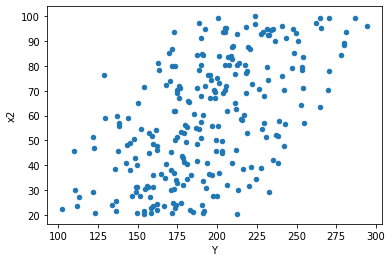

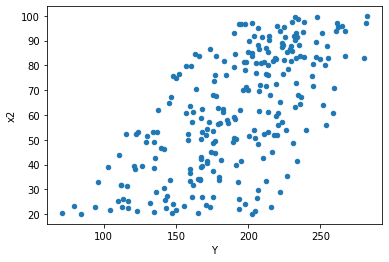

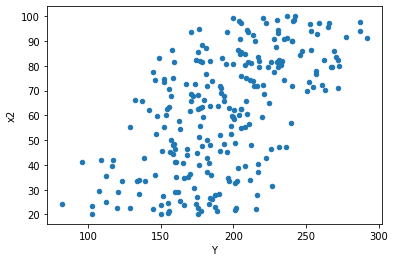

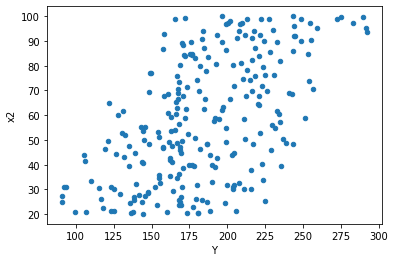

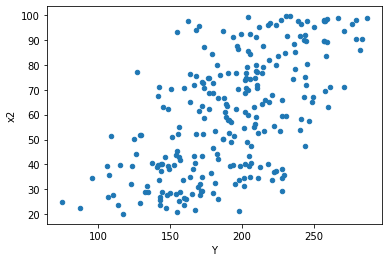

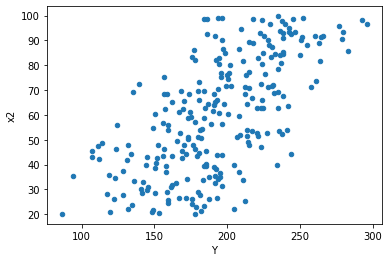

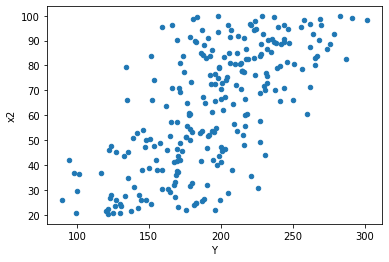

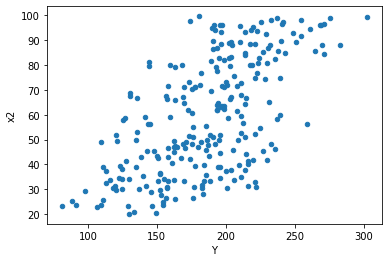

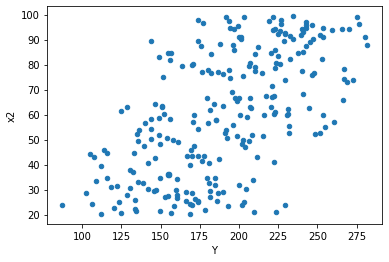

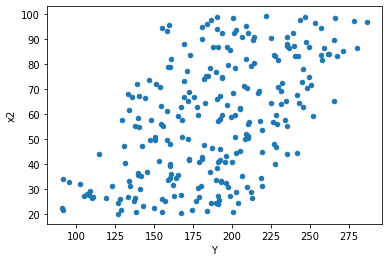

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='Y', y='x2', kind = 'scatter')
tablenew1.plot(x ='Y', y='x2', kind = 'scatter')
tablenew2.plot(x ='Y', y='x2', kind = 'scatter')
tablenew3.plot(x ='Y', y='x2', kind = 'scatter')
tablenew4.plot(x ='Y', y='x2', kind = 'scatter')
tablenew5.plot(x ='Y', y='x2', kind = 'scatter')
tablenew6.plot(x ='Y', y='x2', kind = 'scatter')
tablenew7.plot(x ='Y', y='x2', kind = 'scatter')
tablenew8.plot(x ='Y', y='x2', kind = 'scatter')
tablenew9.plot(x ='Y', y='x2', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม y_hat
    new_table_sort = new_table.sort_values('y_hat')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,97.0,97.0,50.0570792246851,55.122472898470946,0.5160523631410835,0.568272916479082,1.1011923538536765,0.6359492237331403,0.6820253881334298,0.31797461186657017,Reject001=1 : Homoscedasticity
2.0,97.0,97.0,40.18602676440599,48.06042217821403,0.41428893571552566,0.4954682698784952,1.1959485932752785,0.37976798948065915,0.8101160052596704,0.18988399474032958,Reject001=1 : Homoscedasticity
3.0,97.0,97.0,39.42895044097351,52.57627770594756,0.40648402516467536,0.542023481504614,1.3334435007255911,0.1582421232896778,0.9208789383551611,0.0791210616448389,Reject001=1 : Homoscedasticity
4.0,97.0,97.0,52.90163048944383,52.976473489503476,0.5453776339117921,0.5461492112319946,1.0014147579075956,0.9944595093151749,0.5027702453424125,0.49722975465758745,Reject001=1 : Homoscedasticity
5.0,97.0,97.0,41.09981981710592,55.26270060288752,0.42370948265057645,0.5697185629163661,1.3445971502747793,0.1465832283574633,0.9267083858212684,0.07329161417873165,Reject001=1 : Homoscedasticity
6.0,97.0,97.0,48.38533470903304,56.53622205573127,0.4988178835982788,0.5828476500590852,1.1684578063934843,0.44468812435759353,0.7776559378212032,0.22234406217879676,Reject001=1 : Homoscedasticity
8.0,97.0,97.0,41.712218828948934,45.07065841430405,0.43002287452524673,0.46464596303406236,1.080514527388898,0.7037184540785706,0.6481407729607147,0.3518592270392853,Reject001=1 : Homoscedasticity
9.0,97.0,97.0,44.0332331990052,45.591537608429746,0.4539508577217031,0.47001585163329634,1.0353892797828834,0.8643699570445627,0.5678150214777187,0.4321849785222813,Reject001=1 : Homoscedasticity
14.0,97.0,97.0,43.23900757664099,46.32868196739377,0.44576296470763904,0.47761527801436876,1.0714557193588763,0.7346346699152762,0.6326826650423619,0.3673173349576381,Reject001=1 : Homoscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,97.0,97.0,50.0570792246851,55.122472898470946,0.5160523631410835,0.568272916479082,1.1011923538536765,0.6359492237331403,Reject001=1 : Homoscedasticity
1.0,97.0,97.0,49.25607524156625,40.45108205060512,0.5077945901192397,0.41702146443922805,0.821240463277294,0.3337742734456545,Reject001=1 : Homoscedasticity
2.0,97.0,97.0,40.18602676440599,48.06042217821403,0.41428893571552566,0.4954682698784952,1.1959485932752785,0.37976798948065915,Reject001=1 : Homoscedasticity
3.0,97.0,97.0,39.42895044097351,52.57627770594756,0.40648402516467536,0.542023481504614,1.3334435007255911,0.1582421232896778,Reject001=1 : Homoscedasticity
4.0,97.0,97.0,52.90163048944383,52.976473489503476,0.5453776339117921,0.5461492112319946,1.0014147579075956,0.9944595093151749,Reject001=1 : Homoscedasticity
5.0,97.0,97.0,41.09981981710592,55.26270060288752,0.42370948265057645,0.5697185629163661,1.3445971502747793,0.1465832283574633,Reject001=1 : Homoscedasticity
6.0,97.0,97.0,48.38533470903304,56.53622205573127,0.4988178835982788,0.5828476500590852,1.1684578063934843,0.44468812435759353,Reject001=1 : Homoscedasticity
7.0,97.0,97.0,44.511126559286524,41.60205401217252,0.4588775933947064,0.4288871547646652,0.934643924519878,0.7399253448396009,Reject001=1 : Homoscedasticity
8.0,97.0,97.0,41.712218828948934,45.07065841430405,0.43002287452524673,0.46464596303406236,1.080514527388898,0.7037184540785706,Reject001=1 : Homoscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject001=1 : Homoscedasticity      988
Reject001=0 : Heteroscedasticity     12
Name: Result_test, dtype: int64